# Build a Financial Insights Dashboard and Scoring Model

The task involves building a scoring model and insights based on family financial data.

Key Requirements:

Analyze the provided dataset (attached).
Identify patterns and correlations (e.g., income vs. expenses).
Build a scoring model (range: 0–100) to evaluate family financial health based on:
Savings-to-income ratio, spending habits, and achievement of financial goals.
Visualize key insights (e.g., spending patterns, score distributions).

Bonus:
Use AI/ML to predict next month’s expenses or savings trends.

Please submit your work as a Jupyter Notebook or Python script, along with visualizations and a short explanation of your approach.

Important Note:
We understand that the assignment may be challenging. Please focus on doing your best and submit whatever you manage to complete. Partially completed work is acceptable as long as it reflects your problem-solving and coding approach.

In [1]:
import pandas as pd
import numpy as np
# Reading the excel file with the help of pandas
fin_df = pd.read_excel('family_financial_and_transactions_data.xlsx')
fin_df

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,FAM200,FAM200_Member6,2024-10-10,Groceries,79.99,44621,44081,4296,2470,2831,4,92
16302,FAM200,FAM200_Member6,2024-10-22,Education,228.39,44621,44081,4296,2470,2831,4,92
16303,FAM200,FAM200_Member6,2024-10-29,Travel,258.63,44621,44081,4296,2470,2831,4,92
16304,FAM200,FAM200_Member6,2024-10-26,Travel,467.46,44621,44081,4296,2470,2831,4,92


In [2]:
# Columns in the dataframe
fin_df.columns

Index(['Family ID', 'Member ID', 'Transaction Date', 'Category', 'Amount',
       'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)'],
      dtype='object')

In [3]:
print(f"Maximum income: {max(fin_df['Income'])}, Minimum income :{min(fin_df['Income'])}")

Maximum income: 149871, Minimum income :30851


In [4]:
# Checking the unique values in the Category
fin_df['Category'].unique()

array(['Travel', 'Groceries', 'Healthcare', 'Education', 'Utilities',
       'Food', 'Entertainment'], dtype=object)

In [5]:
# Checking for NaN's in the given data set.
fin_df.isna().sum()

Family ID                  0
Member ID                  0
Transaction Date           0
Category                   0
Amount                     0
Income                     0
Savings                    0
Monthly Expenses           0
Loan Payments              0
Credit Card Spending       0
Dependents                 0
Financial Goals Met (%)    0
dtype: int64

In [6]:
# Convert 'Transaction Date' to datetime format
fin_df['Transaction Date'] = pd.to_datetime(fin_df['Transaction Date'])

# Family-Level Spending Patterns
family_spending = fin_df.groupby(['Family ID', 'Category'])['Amount'].sum().reset_index()
family_total_spending = fin_df.groupby('Family ID')['Amount'].sum().reset_index()
family_total_spending=family_total_spending.sort_values(by='Amount', ascending=False)

# Family-Level total Income
family_total_income = fin_df.groupby('Family ID')['Income'].sum().reset_index()


# Member-Level Spending Patterns
member_spending = fin_df.groupby(['Member ID', 'Category'])['Amount'].sum().reset_index()
member_total_spending = fin_df.groupby('Member ID')['Amount'].sum().reset_index()

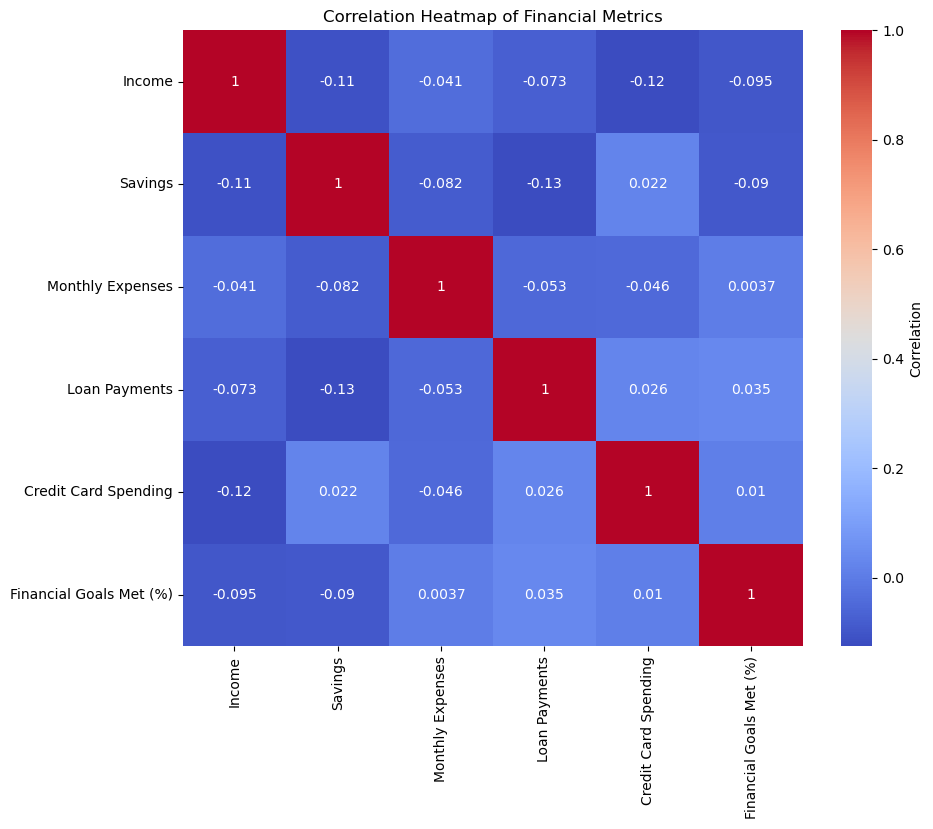

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Analysis
correlation_matrix = fin_df[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 
                             'Credit Card Spending', 'Financial Goals Met (%)']].corr()

# Plot Correlation Matrix using Seaborn and Matplotlib
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'})
heatmap.set_title('Correlation Heatmap of Financial Metrics')

# Show the plot
plt.show()

In [8]:
import plotly.express as px
import plotly.graph_objects as go

# Visualize Spending Patterns
family_spending_fig = px.line(
    family_total_spending,
    y='Family ID',
    x='Amount',
    orientation = 'h',
    #color='Category',
    title="Family-Level Spending Patterns",
    labels={"Amount": "Spending Amount", "Category": "Spending Category"}
)

family_spending_fig.show()

In [9]:
import numpy as np
import plotly.graph_objects as go

# Apply log transformation to income
family_total_income['Log Income'] = np.log(family_total_income['Income'])

# Extract data for plotting
family_ids = family_total_spending['Family ID']
spending = family_total_spending['Amount']
log_income = family_total_income['Log Income']

# Create the figure
fig = go.Figure()

# Add log-transformed income as bar chart
fig.add_trace(go.Bar(
    x=family_ids,
    y=log_income,
    name='Log Transformed Income',
    marker_color='green'
))

# Add spending as line chart
fig.add_trace(go.Scatter(
    x=family_ids,
    y=spending,
    name='Total Spending',
    mode='lines+markers',
    line=dict(color='blue', width=2)
))

# Update layout
fig.update_layout(
    title="Log-Transformed Income (Bar) vs Total Spending (Line)",
    xaxis_title="Family ID",
    yaxis_title="Amount",
    legend_title="Metric",
    template="plotly_white"
)

# Show the plot
fig.show()

In [10]:
member_spending_fig = px.bar(
    member_spending,
    x='Member ID',
    y='Amount',
    color='Category',
    title="Member-Level Spending Patterns",
    labels={"Amount": "Spending Amount", "Category": "Spending Category"}
)

member_spending_fig.show()

In [11]:
member_spending_fig = px.bar(
    member_spending.sort_values(by='Amount'),
    x='Member ID',
    y='Amount',
    color='Category',
    title="Member-Level Spending Patterns",
    labels={"Amount": "Spending Amount", "Category": "Spending Category"}
)

# Update layout to add a horizontal scrollbar
member_spending_fig.update_layout(
    xaxis=dict(
        automargin=True,
        tickangle=45,
        title=dict(standoff=15),
        rangeslider=dict(visible=True)  # Adds horizontal scroll
    ),
    height=600,  # Adjust height for better visibility
    margin=dict(l=20, r=20, t=60, b=20),  # Set margins
)

member_spending_fig.show()

In [12]:
# Pivot the data for correlation analysis
pivot_spending = member_spending.pivot_table(
    index='Member ID',
    columns='Category',
    values='Amount',
    aggfunc='sum',
    fill_value=0
)

# Compute correlation matrix
correlation_matrix = pivot_spending.corr()

# Display the correlation matrix
print(correlation_matrix)

Category       Education  Entertainment      Food  Groceries  Healthcare  \
Category                                                                   
Education       1.000000       0.165548  0.203400   0.191766    0.163246   
Entertainment   0.165548       1.000000  0.221201   0.200634    0.213515   
Food            0.203400       0.221201  1.000000   0.271630    0.169322   
Groceries       0.191766       0.200634  0.271630   1.000000    0.184810   
Healthcare      0.163246       0.213515  0.169322   0.184810    1.000000   
Travel          0.132700       0.168852  0.165583   0.162150    0.152191   
Utilities       0.155864       0.245556  0.211383   0.191536    0.185037   

Category         Travel  Utilities  
Category                            
Education      0.132700   0.155864  
Entertainment  0.168852   0.245556  
Food           0.165583   0.211383  
Groceries      0.162150   0.191536  
Healthcare     0.152191   0.185037  
Travel         1.000000   0.209742  
Utilities      0.20

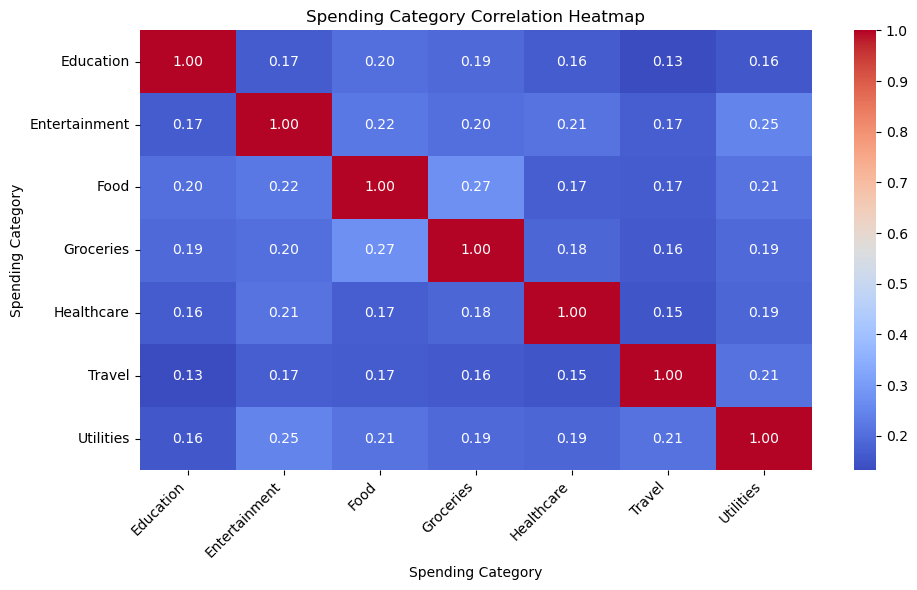

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure for the plot
plt.figure(figsize=(10, 6))

# Generate the heatmap using Seaborn (This creates the mappable)
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")  # Adjust parameters as needed

# Customize the plot (rest of the code remains the same)
plt.xlabel("Spending Category")
plt.ylabel("Spending Category")
plt.title("Spending Category Correlation Heatmap")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

# K-Means clustring

In [14]:
from sklearn.cluster import KMeans
import plotly.express as px

# Pivot data to have categories as columns
pivot_spending = member_spending.pivot_table(
    index='Member ID',
    columns='Category',
    values='Amount',
    aggfunc='sum',
    fill_value=0
)


# Compute Mean Absolute Deviation (MAD) normalization
mad_normalized = pivot_spending.apply(
    lambda x: (x - x.median()) / (np.mean(np.abs(x - x.median())) if np.mean(np.abs(x - x.median())) != 0 else 1),
    axis=0
)

# Replace NaNs (e.g., if a category has constant values) with 0
mad_normalized = mad_normalized.fillna(0)

In [15]:
# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
mad_normalized['Cluster'] = kmeans.fit_predict(mad_normalized)

# Add cluster labels back to the original pivot data for interpretation
pivot_spending['Cluster'] = mad_normalized['Cluster']

Cluster 0:	
	
	•High spending on Entertainment and Travel.

	•Could indicate leisure-oriented members.

Cluster 1:
	
	•Higher allocation to Healthcare and Education.

	•Focused on essentials and long-term priorities.

Cluster 2:
	
	•Balanced spending across Food, Groceries, and Utilities.
	
	•Conservative spenders prioritizing necessities.


In [16]:
# Scatter plot for clusters
scatter_fig = px.scatter(
    mad_normalized,
    x='Entertainment',
    y='Travel',
    color=mad_normalized['Cluster'].astype(str),
    title='Clustering Members Based on Spending Patterns',
    labels={'Cluster': 'Spending Cluster', 'Entertainment': 'Entertainment Spending (Normalized)', 'Travel': 'Travel Spending (Normalized)'},
    hover_name=pivot_spending.index
)

scatter_fig.show()

In [17]:
import plotly.graph_objects as go

# Compute average spending pattern for Cluster 0
cluster_0_avg = pivot_spending[pivot_spending['Cluster'] == 0].mean().drop('Cluster')

# Radar chart
radar_fig = go.Figure()
radar_fig.add_trace(go.Scatterpolar(
    r=cluster_0_avg.values,
    theta=cluster_0_avg.index,
    fill='toself',
    name='Cluster 0 Average Spending'
))

radar_fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title="Spending Pattern of family members higly on Entertainment and Travel"
)
radar_fig.show()

In [18]:
# Compute average spending pattern for Cluster 1
cluster_0_avg = pivot_spending[pivot_spending['Cluster'] == 1].mean().drop('Cluster')

# Radar chart
radar_fig = go.Figure()
radar_fig.add_trace(go.Scatterpolar(
    r=cluster_0_avg.values,
    theta=cluster_0_avg.index,
    fill='toself',
    name='Cluster 1 Average Spending'
))

radar_fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title="Spending Pattern of family members higly on Health and Education"
)
radar_fig.show()

In [19]:
# Compute average spending pattern for Cluster 1
cluster_0_avg = pivot_spending[pivot_spending['Cluster'] == 2].mean().drop('Cluster')

# Radar chart
radar_fig = go.Figure()
radar_fig.add_trace(go.Scatterpolar(
    r=cluster_0_avg.values,
    theta=cluster_0_avg.index,
    fill='toself',
    name='Cluster 2 Average Spending'
))

radar_fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title="Spending Pattern of family members on all categories"
)
radar_fig.show()

In [20]:
from sklearn.preprocessing import StandardScaler

# Normalize the spending data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(pivot_spending)

# Convert back to a DataFrame for clarity
normalized_spending = pd.DataFrame(normalized_data, index=pivot_spending.index, columns=pivot_spending.columns)
print(normalized_spending.head())

Category        Education  Entertainment      Food  Groceries  Healthcare  \
Member ID                                                                   
FAM001_Member1   0.034671       1.908667 -0.233453  -0.232545    0.963345   
FAM001_Member2  -0.965162      -0.930235  2.652648   1.548187   -0.248917   
FAM001_Member3   0.469433      -0.467876 -0.778139  -0.717486   -1.242324   
FAM001_Member4  -0.150867       2.454125  1.740368   0.906336   -1.242324   
FAM002_Member1   0.238245      -0.467327 -0.191371  -1.167475    0.792174   

Category          Travel  Utilities   Cluster  
Member ID                                      
FAM001_Member1  0.617300   0.872439 -1.471800  
FAM001_Member2  2.422790   0.397500 -1.471800  
FAM001_Member3 -0.704158  -1.173841  0.961926  
FAM001_Member4  1.684333   0.260092 -1.471800  
FAM002_Member1 -1.017117  -0.868507  0.961926  


# Scoring 

In [21]:
# Define category penalties (adjust values based on actual data distribution)
penalty_categories = ['Travel', 'Entertainment']

# Calculate required metrics
fin_df['Savings-to-Income'] = (fin_df['Savings'] / fin_df['Income']) * 100
fin_df['Expenses-to-Income'] = (fin_df['Monthly Expenses'] / fin_df['Income']) * 100
fin_df['Loan-to-Income'] = (fin_df['Loan Payments'] / fin_df['Income']) * 100

# Calculate average credit card spending per family
credit_card_spending = fin_df.groupby('Family ID')['Credit Card Spending'].mean().reset_index()
credit_card_spending.columns = ['Family ID', 'Avg Credit Card Spending']

In [22]:
# Penalize families with high spending on travel and entertainment
category_penalty = fin_df[fin_df['Category'].isin(penalty_categories)] \
    .groupby('Family ID')['Amount'].sum().reset_index()
category_penalty.columns = ['Family ID', 'Non-Essential Spending']

# Aggregate financial goals met by family
financial_goals = fin_df.groupby('Family ID')['Financial Goals Met (%)'].mean().reset_index()

# Merge all metrics into one dataframe
metrics = pd.merge(credit_card_spending, category_penalty, on='Family ID', how='left')
metrics = pd.merge(metrics, financial_goals, on='Family ID', how='left')

# Filter numeric columns only for aggregation, excluding Financial Goals Met (%)
numeric_columns = [col for col in fin_df.select_dtypes(include=np.number).columns if col != 'Financial Goals Met (%)']

# Perform group-by operation on numeric data
grouped_data = fin_df.groupby('Family ID')[numeric_columns].mean().reset_index()

# Merge aggregated data back into metrics
metrics = pd.merge(metrics, grouped_data, on='Family ID', how='left')

# Check for duplicate columns
print(metrics.columns)  # Ensure no duplication of columns

Index(['Family ID', 'Avg Credit Card Spending', 'Non-Essential Spending',
       'Financial Goals Met (%)', 'Amount', 'Income', 'Savings',
       'Monthly Expenses', 'Loan Payments', 'Credit Card Spending',
       'Dependents', 'Savings-to-Income', 'Expenses-to-Income',
       'Loan-to-Income'],
      dtype='object')


In [23]:
metrics

,Family ID,Avg Credit Card Spending,Non-Essential Spending,Financial Goals Met (%),Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Savings-to-Income,Expenses-to-Income,Loan-to-Income
0,FAM001,2959.0,8745.67,68.0,249.343011,113810.0,20234.0,5781.0,2422.0,2959.0,2.0,17.778754,5.079518,2.128108
1,FAM002,995.0,5718.51,60.0,253.519432,44592.0,29492.0,5630.0,4541.0,995.0,3.0,66.137424,12.625583,10.183441
2,FAM003,2818.0,3937.08,100.0,238.730638,33278.0,11365.0,5282.0,1042.0,2818.0,0.0,34.151692,15.872348,3.131198
3,FAM004,668.0,6224.62,82.0,247.190526,127196.0,30735.0,3591.0,1571.0,668.0,3.0,24.163496,2.823202,1.235102
4,FAM005,1922.0,11420.90,89.0,243.916424,66048.0,1212.0,3136.0,3444.0,1922.0,5.0,1.835029,4.748062,5.214390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,FAM196,744.0,6416.63,26.0,253.494677,64973.0,3604.0,3533.0,622.0,744.0,5.0,5.546919,5.437643,0.957321
196,FAM197,1179.0,733.55,62.0,212.253684,130741.0,41591.0,6463.0,4850.0,1179.0,0.0,31.811750,4.943361,3.709624
197,FAM198,1759.0,6989.80,51.0,254.981447,114012.0,6372.0,4345.0,1989.0,1759.0,2.0,5.588885,3.811002,1.744553
198,FAM199,2937.0,8116.29,36.0,265.039744,74587.0,28474.0,3672.0,834.0,2937.0,5.0,38.175553,4.923110,1.118157


In [24]:

# Handle missing values for non-essential spending
metrics['Non-Essential Spending'] = metrics['Non-Essential Spending'].fillna(0)

# Normalize metrics to a 0–100 range
metrics['Savings-to-Income'] = (metrics['Savings-to-Income'] - metrics['Savings-to-Income'].min()) / \
                               (metrics['Savings-to-Income'].max() - metrics['Savings-to-Income'].min()) * 100
metrics['Expenses-to-Income'] = (metrics['Expenses-to-Income'] - metrics['Expenses-to-Income'].min()) / \
                                (metrics['Expenses-to-Income'].max() - metrics['Expenses-to-Income'].min()) * 100
metrics['Loan-to-Income'] = (metrics['Loan-to-Income'] - metrics['Loan-to-Income'].min()) / \
                            (metrics['Loan-to-Income'].max() - metrics['Loan-to-Income'].min()) * 100
metrics['Avg Credit Card Spending'] = (metrics['Avg Credit Card Spending'] - metrics['Avg Credit Card Spending'].min()) / \
                                      (metrics['Avg Credit Card Spending'].max() - metrics['Avg Credit Card Spending'].min()) * 100
metrics['Non-Essential Spending'] = (metrics['Non-Essential Spending'] - metrics['Non-Essential Spending'].min()) / \
                                    (metrics['Non-Essential Spending'].max() - metrics['Non-Essential Spending'].min()) * 100

# Assign weights and calculate final score
metrics['Financial Health Score'] = (
    0.25 * metrics['Savings-to-Income'] -
    0.20 * metrics['Expenses-to-Income'] -
    0.15 * metrics['Loan-to-Income'] -
    0.10 * metrics['Avg Credit Card Spending'] -
    0.15 * metrics['Non-Essential Spending'] +
    0.15 * metrics['Financial Goals Met (%)'] 
)

# Scale the final score to 0–100
metrics['Financial Health Score'] = (metrics['Financial Health Score'] - metrics['Financial Health Score'].min()) / \
                                    (metrics['Financial Health Score'].max() - metrics['Financial Health Score'].min()) * 100

# Display final scoring
metrics[['Family ID', 'Financial Health Score']]

,Family ID,Financial Health Score
0,FAM001,34.080315
1,FAM002,42.417480
2,FAM003,40.194838
3,FAM004,84.849674
4,FAM005,30.634411
...,...,...
195,FAM196,44.795690
196,FAM197,78.320883
197,FAM198,44.197988
198,FAM199,36.116847


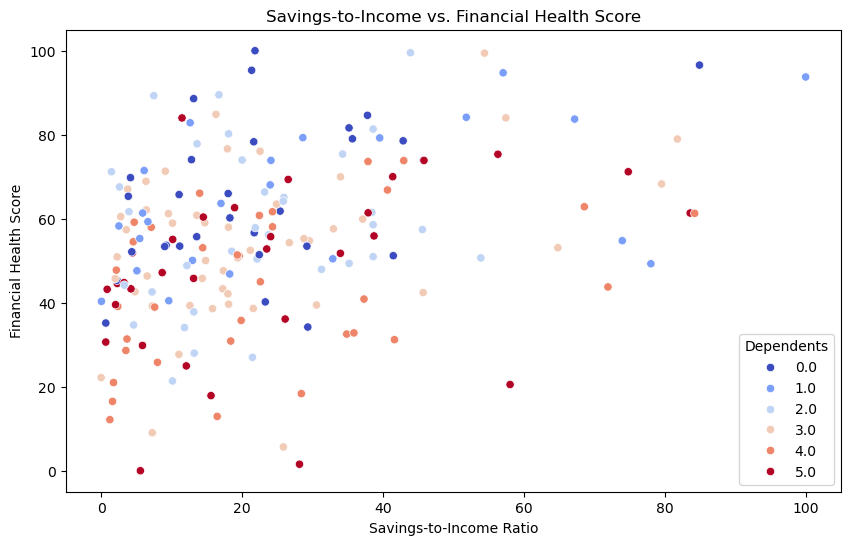

In [25]:
# Scatter plot for Savings-to-Income vs. Financial Health Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=metrics, x='Savings-to-Income', y='Financial Health Score', hue='Dependents', palette='coolwarm')
plt.title('Savings-to-Income vs. Financial Health Score')
plt.xlabel('Savings-to-Income Ratio')
plt.ylabel('Financial Health Score')
plt.show()

/var/folders/0l/_03phsp93n92lh_gh7j54vv00000gn/T/ipykernel_7880/2279698905.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




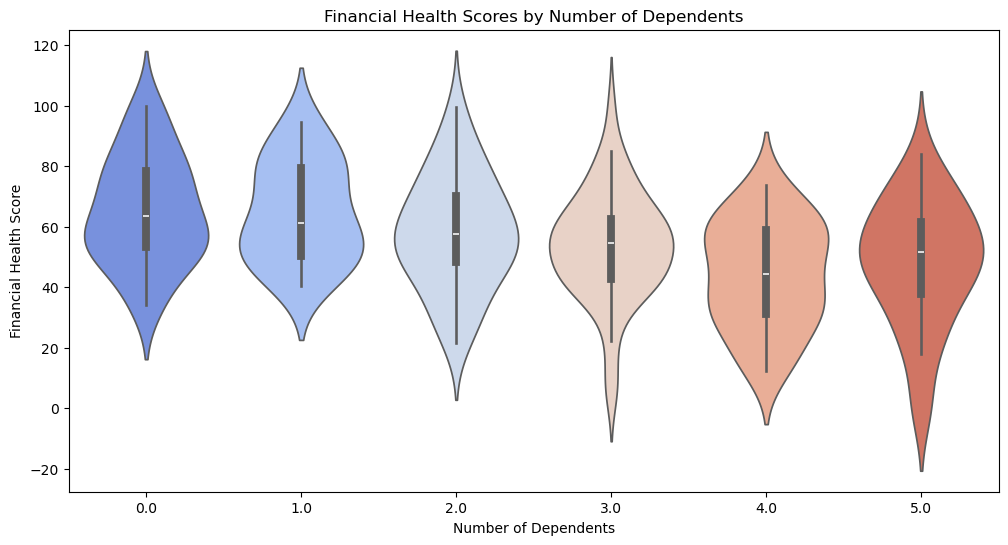

In [26]:
# Violin plot for Financial Health Scores by Dependents
plt.figure(figsize=(12, 6))
sns.violinplot(data=metrics, x='Dependents', y='Financial Health Score', palette='coolwarm')
plt.title('Financial Health Scores by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Financial Health Score')
plt.show()

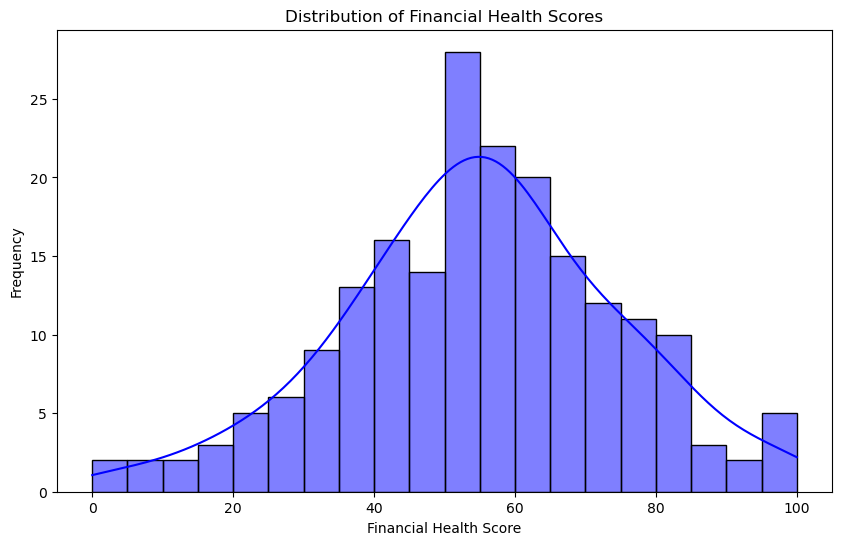

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Financial Health Scores
plt.figure(figsize=(10, 6))
sns.histplot(data=metrics, x='Financial Health Score', bins=20, kde=True, color='blue')
plt.title('Distribution of Financial Health Scores')
plt.xlabel('Financial Health Score')
plt.ylabel('Frequency')
plt.show()

# Prediction of savings for all the families 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np


# Aggregate data at the family level
family_data = fin_df.groupby("Family ID").agg({
    "Income": "mean",
    "Savings": "mean",
    "Monthly Expenses": "mean",
    "Loan Payments": "mean",
    "Credit Card Spending": "mean",
    "Dependents": "mean",
    "Expenses-to-Income": "mean",
    "Savings-to-Income": "mean",
    "Loan-to-Income": "mean"
}).reset_index()

In [29]:
# Define the MAD standardization function
def mad_standardize(df):
    # Compute the median and MAD for each column
    medians = df.median()
    mad_values = df.apply(lambda x: np.median(np.abs(x - np.median(x))), axis=0)
    
    # Standardize the data
    standardized_df = (df - medians) / mad_values
    return standardized_df


In [30]:
# Features and Target
X = family_data.drop(columns=["Family ID", "Savings"])
y = family_data["Savings"]

X_normalized = mad_standardize(X)

# Check the first few rows of the normalized data
print(X_normalized.head())


     Income  Monthly Expenses  Loan Payments  Credit Card Spending  \
0  0.892167          1.409696      -0.131971              1.965937   
1 -1.456475          1.306589       1.672201             -1.219789   
2 -1.840371          1.068966      -1.306939              1.737226   
3  1.346369         -0.085695      -0.856535             -1.750203   
4 -0.728450         -0.396381       0.738186              0.283861   

   Dependents  Expenses-to-Income  Savings-to-Income  Loan-to-Income  
0        -1.0            0.406096          -0.573130       -0.571803  
1         0.0            4.610538           2.444860        4.845190  
2        -3.0            6.419538           0.448680        0.102747  
3         0.0           -0.851056          -0.174668       -1.172326  
4         2.0            0.221419          -1.568153        1.503637  


In [31]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [32]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 2906.46125


In [33]:
# Predict savings for next month
family_data["Predicted_Savings"] = model.predict(X_normalized)
print(family_data[["Family ID", "Savings", "Predicted_Savings"]])

    Family ID  Savings  Predicted_Savings
0      FAM001  20234.0           19889.27
1      FAM002  29492.0           30031.21
2      FAM003  11365.0           13218.76
3      FAM004  30735.0           30365.38
4      FAM005   1212.0            1717.32
..        ...      ...                ...
195    FAM196   3604.0            4348.51
196    FAM197  41591.0           39171.36
197    FAM198   6372.0            6234.40
198    FAM199  28474.0           30697.68
199    FAM200  44081.0           40895.96

[200 rows x 3 columns]


In [34]:
mape = (abs(y_test - y_pred) / y_test).mean() * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 19.14%


In [35]:
feature_importances = model.feature_importances_
feature_names = X_normalized.columns
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance:.2f}")

Income: 0.11
Monthly Expenses: 0.01
Loan Payments: 0.01
Credit Card Spending: 0.01
Dependents: 0.00
Expenses-to-Income: 0.02
Savings-to-Income: 0.83
Loan-to-Income: 0.02


In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_normalized, y, scoring="neg_mean_absolute_error", cv=5)
print(f"Cross-validated MAE: {-scores.mean()}")

Cross-validated MAE: 2592.64065


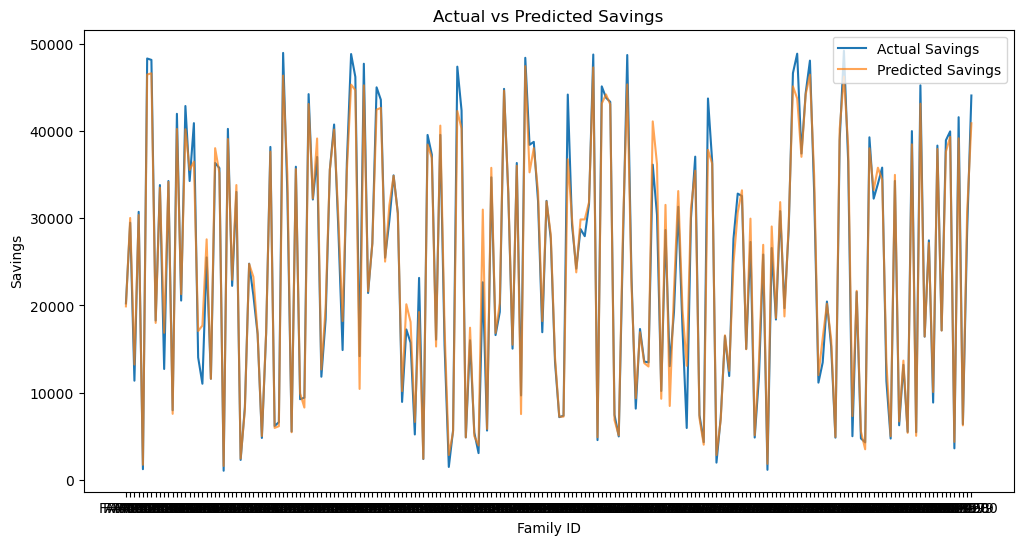

In [37]:
import matplotlib.pyplot as plt

# Line Chart for Actual vs Predicted Savings

plt.figure(figsize=(12, 6))
plt.plot(family_data["Family ID"], family_data["Savings"], label="Actual Savings")
plt.plot(family_data["Family ID"], family_data["Predicted_Savings"], label="Predicted Savings", alpha=0.7)
plt.xlabel("Family ID")
plt.ylabel("Savings")
plt.title("Actual vs Predicted Savings")
plt.legend()
plt.show()